## Trabalho Prático 1
# Desafio 1
 Este Slide é relativo ao trabalho do grupo 3 no desafio 1 do curso de Data Science, Digital House. Tivemos como objetivo limpar, analisar e filtrar todas as informações relevantes, que nos permita prever o preço do metro quadrado de um imóvel. O dataset utilizado foi disponibilizado pela imobiliária [Properati](https://drive.google.com/file/d/1kBYxElAtGSkQHvYpqD4n3Z6ms6P6SNz_/view) no primeiro semestre de 2017.
 
## Leitura dos dados e importação das bibliotecas utilizadas
 Para iniciar o trabalho, o primeiro passo é fazer o download do dataset no link disponibilizado acima.
No código abaixo, temos as importações das bibliotecas que serão utilizadas, desde a limpeza dos dados até a conclusão do projeto, com os valores previstos dos imóveis. Em seguida o código `pandas.read_csv()` utilizado para importar os dados e formar nosso DataFrame.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.model_selection import train_test_split

In [2]:
df_properati = pd.read_csv('Real_State_Properati.csv', sep='\t')

In [3]:
df_properati

,property_type,place_name,country_name,state_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,Argentina,Capital Federal,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,Argentina,Capital Federal,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,Argentina,Capital Federal,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,Argentina,Capital Federal,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,Argentina,Capital Federal,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,Argentina,Capital Federal,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,Argentina,Capital Federal,-34.563685,-58.442683,410000.0,USD,157.0


###
#             Analise preliminar dos dados.
#
###

In [5]:
#informações de todos os tipos de dados que têm em cada coluna.
df_properati.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17223 entries, 0 to 17222
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17223 non-null  object 
 1   place_name           17223 non-null  object 
 2   country_name         17223 non-null  object 
 3   state_name           17223 non-null  object 
 4   lat                  17223 non-null  float64
 5   lon                  17223 non-null  float64
 6   price                17223 non-null  float64
 7   currency             17223 non-null  object 
 8   surface_total_in_m2  17223 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.2+ MB


In [6]:
#indentificandose existe valores nulos nas colunas.
df_properati.isnull().sum()

property_type          0
place_name             0
country_name           0
state_name             0
lat                    0
lon                    0
price                  0
currency               0
surface_total_in_m2    0
dtype: int64

In [7]:
# indeficando os valores em cada coluna.
print(df_properati.currency.unique())
print(df_properati.country_name.unique())
print(df_properati.state_name.unique())
print(df_properati.property_type.unique())
print(df_properati.place_name.unique())

['USD' 'ARS']
['Argentina']
['Capital Federal']
['PH' 'apartment' 'house' 'store']
['Mataderos' 'Belgrano' 'Palermo' 'Flores' 'Boedo' 'Las Cañitas'
 'Puerto Madero' 'Balvanera' 'Caballito' 'Nuñez' 'Floresta' 'Barracas'
 'Recoleta' 'Congreso' 'Villa Crespo' 'Chacarita' 'Almagro' 'Constitución'
 'Colegiales' 'Villa Urquiza' 'Barrio Norte' 'Palermo Hollywood'
 'Saavedra' 'Paternal' 'Agronomía' 'Villa Pueyrredón' 'Coghlan'
 'Parque Centenario' 'San Telmo' 'Monserrat' 'Boca' 'Parque Avellaneda'
 'San Cristobal' 'Abasto' 'Versalles' 'Villa del Parque' 'Monte Castro'
 'Retiro' 'Capital Federal' 'Parque Chas' 'Palermo Chico' 'Villa Devoto'
 'Palermo Soho' 'Centro / Microcentro' 'Liniers' 'Tribunales' 'Once'
 'San Nicolás' 'Parque Chacabuco' 'Velez Sarsfield' 'Catalinas' 'Pompeya'
 'Parque Patricios' 'Palermo Viejo' 'Villa Lugano' 'Villa Luro'
 'Villa General Mitre' 'Villa Ortuzar' 'Villa Santa Rita' 'Villa Soldati'
 'Villa Real' 'Villa Riachuelo']


* Apos verificarmos quais colunas possuem o mesmo valor nas linhas, as eliminamos criando uma copia do DF original.


In [9]:
df_properati_std = df_properati[['property_type',
                                'place_name',
                                'lat',
                                'lon',
                                'price',
                                'currency',
                                'surface_total_in_m2']].copy()
df_properati_std

,property_type,place_name,lat,lon,price,currency,surface_total_in_m2
0,PH,Mataderos,-34.661824,-58.508839,62000.0,USD,55.0
1,apartment,Mataderos,-34.652262,-58.522982,72000.0,USD,55.0
2,apartment,Belgrano,-34.559873,-58.443362,138000.0,USD,45.0
3,apartment,Belgrano,-34.559873,-58.443362,195000.0,USD,65.0
4,PH,Mataderos,-34.652356,-58.501624,239000.0,USD,140.0
...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,-34.599214,-58.402519,165000.0,USD,91.0
17219,apartment,Recoleta,-34.587425,-58.397372,165000.0,USD,44.0
17220,apartment,Belgrano,-34.563685,-58.442683,410000.0,USD,157.0
17221,apartment,Belgrano,-34.563685,-58.442683,410000.0,USD,157.0



* Para padronizar as contas e eliminar a coluna 'currency' vamos passar todos os preços para `USD`.


In [11]:
dolar={'USD':1, 'ARS': 0.0085}
df_properati_std['preco_dolar'] = df_properati_std.currency.map(dolar)*df_properati_std.price

df_properati_std['price'] = df_properati_std['preco_dolar']

df_properati_std.drop(columns=['currency', 'preco_dolar'], inplace = True)

###
#             Criando colunas novas para analise.
###

In [13]:
# Coluna do preço por metro quadrado.

df_properati_std['price_m2'] = df_properati_std['price'] / df_properati_std['surface_total_in_m2']

# FATIAMENTO DE DADOS
 VAMOS CRIAR NOVOS CONJUNTOS DE DADOS EM NOVAS COLUNAS AGRUPANDO PARAMETROS COMUNS

<AxesSubplot:xlabel='surface_total_in_m2', ylabel='price_m2'>

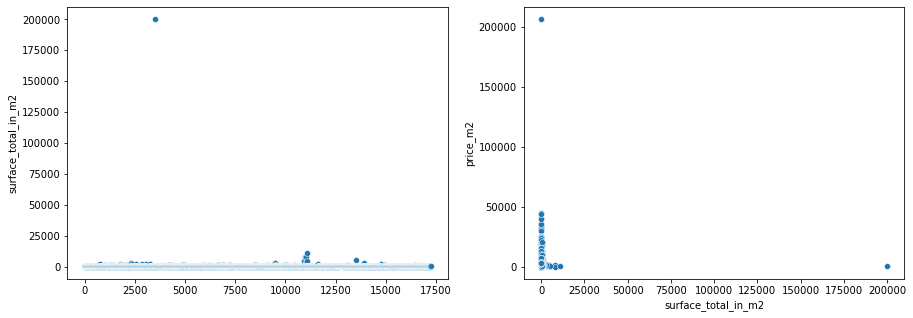

In [15]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.scatterplot(ax=axes[0], data = df_properati_std['surface_total_in_m2'])

sns.scatterplot(ax=axes[1], data = df_properati_std,
                x = 'surface_total_in_m2',
                y = 'price_m2')

In [16]:
lista_drop = []

lista_drop.append(list(df_properati_std[df_properati_std['price_m2'] > 100000].index)) 

lista_drop.append(list(df_properati_std[df_properati_std['surface_total_in_m2'] > 25000].index)) 

lista_drop.append(list(df_properati_std[df_properati_std['price'] > 20000000].index)) 

lista_drop = set(sum(lista_drop, []))
lista_drop = list(lista_drop) 

df_properati_std.drop(lista_drop, inplace=True)
df_properati_std.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17215 entries, 0 to 17222
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        17215 non-null  object 
 1   place_name           17215 non-null  object 
 2   lat                  17215 non-null  float64
 3   lon                  17215 non-null  float64
 4   price                17215 non-null  float64
 5   surface_total_in_m2  17215 non-null  float64
 6   price_m2             17215 non-null  float64
dtypes: float64(5), object(2)
memory usage: 1.1+ MB


In [17]:
#Então definimos as faixas de luxo do m2 dos imóveis com a lista abaixo.

bins_lux = [0, 2500, 5000, 7500, 10000, 15000, 30000, 50000] 

luxury_m2_type = pd.cut(df_properati_std.price_m2, bins= bins_lux, right = False)
group_labels = ['super_popular', 'popular', 'normal', 'good', 'great', 'luxury', 'extreme_luxury']
luxury_m2_type_categorizado = pd.cut(df_properati_std.price_m2, bins = bins_lux, labels = group_labels)

df_properati_std['luxury_m2_type'] = luxury_m2_type_categorizado


#Então definimos as faixas de tamanho do m2 dos imóveis com a lista abaixo.

bins_m2 = [0, 20, 80, 200, 400, 600, 1000, 2000, 20000] 

surface_m2_type = pd.cut(df_properati_std.surface_total_in_m2, bins= bins_m2, right = False)

group_labels = ['XP', 'P','M', 'G', 'GG', 'XG', 'XXG', 'XXXG']
surface_m2_type_categorizado = pd.cut(df_properati_std.surface_total_in_m2, bins = bins_m2, labels = group_labels)

df_properati_std['surface_m2_type'] = surface_m2_type_categorizado

df_properati_std

,property_type,place_name,lat,lon,price,surface_total_in_m2,price_m2,luxury_m2_type,surface_m2_type
0,PH,Mataderos,-34.661824,-58.508839,62000.0,55.0,1127.272727,super_popular,P
1,apartment,Mataderos,-34.652262,-58.522982,72000.0,55.0,1309.090909,super_popular,P
2,apartment,Belgrano,-34.559873,-58.443362,138000.0,45.0,3066.666667,popular,P
3,apartment,Belgrano,-34.559873,-58.443362,195000.0,65.0,3000.000000,popular,P
4,PH,Mataderos,-34.652356,-58.501624,239000.0,140.0,1707.142857,super_popular,M
...,...,...,...,...,...,...,...,...,...
17218,apartment,Barrio Norte,-34.599214,-58.402519,165000.0,91.0,1813.186813,super_popular,M
17219,apartment,Recoleta,-34.587425,-58.397372,165000.0,44.0,3750.000000,popular,P
17220,apartment,Belgrano,-34.563685,-58.442683,410000.0,157.0,2611.464968,popular,M
17221,apartment,Belgrano,-34.563685,-58.442683,410000.0,157.0,2611.464968,popular,M


<AxesSubplot:xlabel='place_name', ylabel='price_m2'>

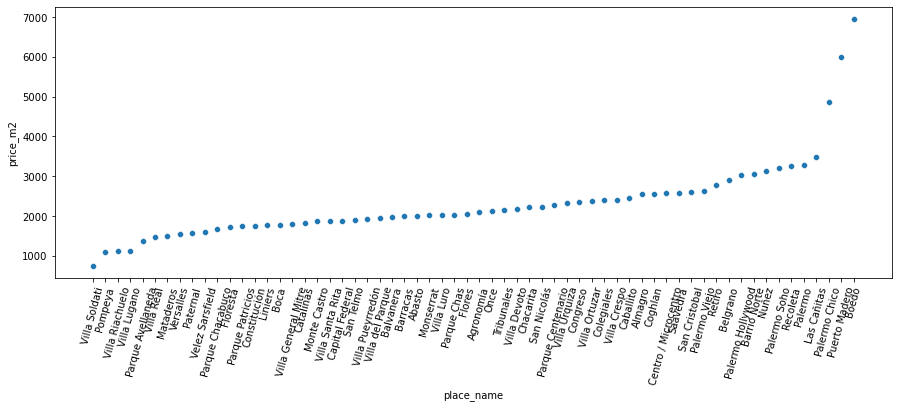

In [18]:
#gráficos para comparar os valores de imóveis em cada bairro
group_place_m2 = df_properati_std.groupby(['place_name']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_place_m2) 
ax.figure.set_size_inches(15, 5)
plt.xticks(rotation=75)
ax

<AxesSubplot:xlabel='property_type', ylabel='price_m2'>

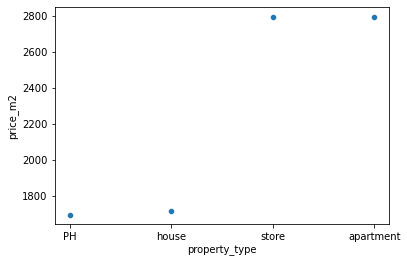

In [19]:
#gráfico compara os valores em imóveis
group_property_type_m2 = df_properati_std.groupby(['property_type']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_property_type_m2) 
plt.xticks(rotation=0)
ax

<AxesSubplot:xlabel='surface_m2_type', ylabel='price_m2'>

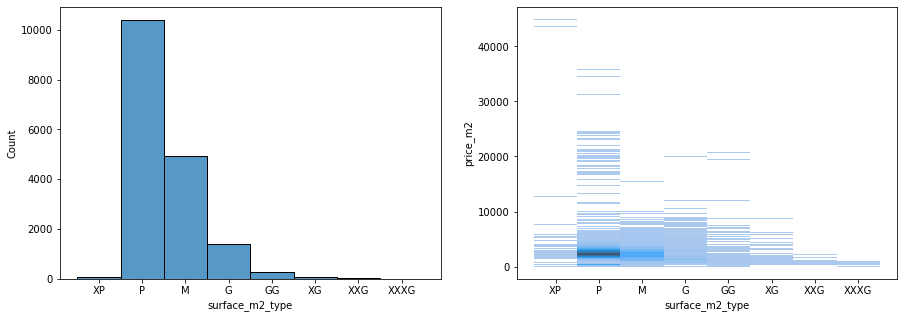

In [20]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.histplot(ax=axes[0], data = df_properati_std.surface_m2_type)

sns.histplot(ax=axes[1], data = df_properati_std,  
             x = 'surface_m2_type',
             y = 'price_m2')

<AxesSubplot:title={'center':'Propiedade'}, xlabel='Tipo de Propriedade', ylabel='Preço do m2'>

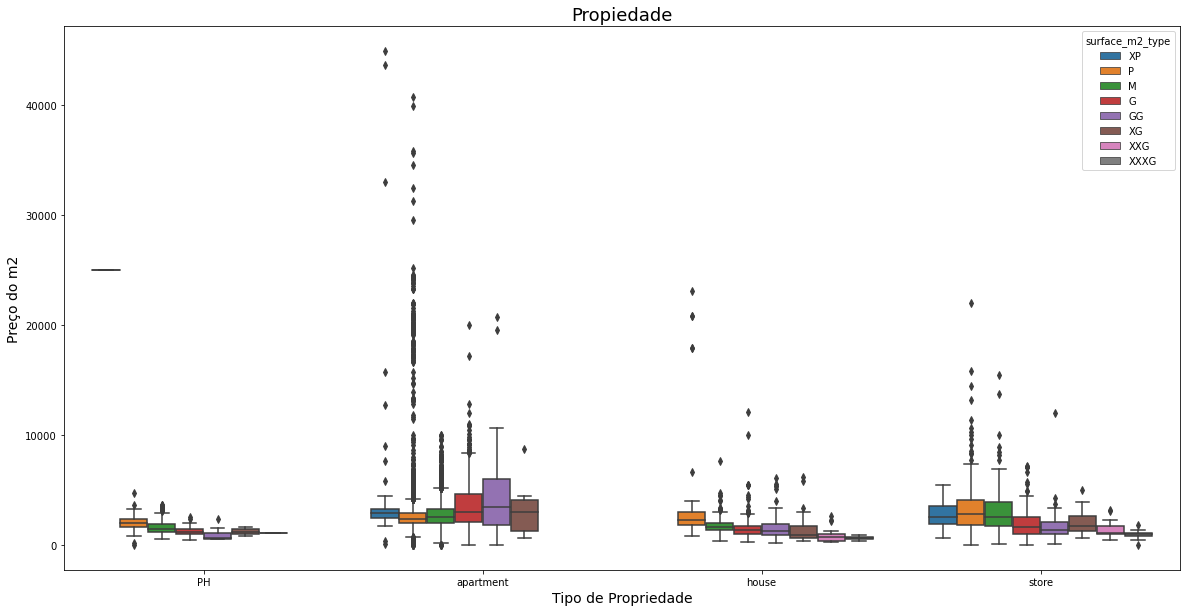

In [21]:
#conferiindo os outliers
#boxplot com outliers

ax = sns.boxplot(x='property_type', y='price_m2', data=df_properati_std, hue='surface_m2_type')
ax.figure.set_size_inches(20, 10)
ax.set_title('Propiedade', fontsize=18)
ax.set_xlabel('Tipo de Propriedade', fontsize=14)
ax.set_ylabel('Preço do m2', fontsize=14)
plt.xticks(rotation=0)
ax

In [22]:
pd.crosstab(df_properati_std.surface_m2_type, df_properati_std.luxury_m2_type)

luxury_m2_type,super_popular,popular,normal,good,great,luxury,extreme_luxury
surface_m2_type,,,,,,,
XP,30,52,3,2,1,2,3
P,5953,4133,147,18,21,116,7
M,2730,1867,293,30,1,1,0
G,859,382,119,29,8,2,0
GG,199,34,23,3,6,2,0
XG,61,18,3,1,0,0,0
XXG,38,3,0,0,0,0,0
XXXG,15,0,0,0,0,0,0


<AxesSubplot:>

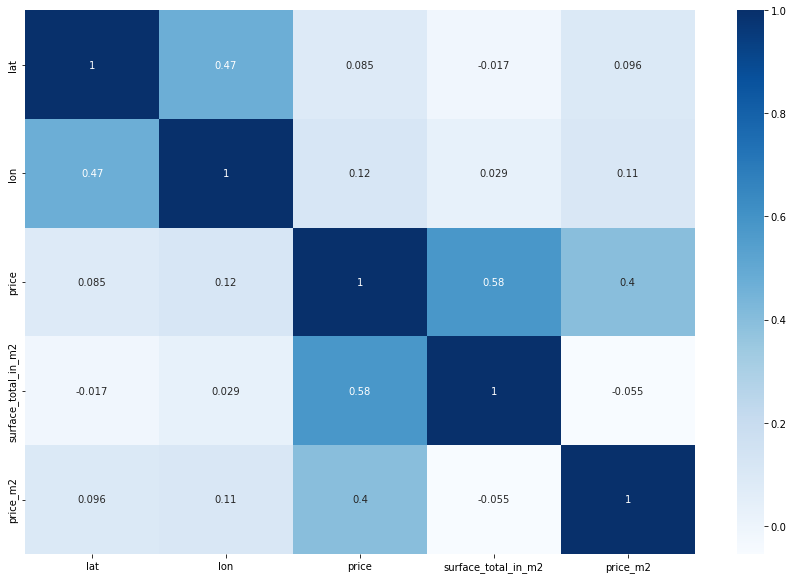

In [23]:
#heatmap: verificando a corelação entre as colunas
plt.figure(figsize=(15,10))
sns.heatmap(df_properati_std.corr(), annot = True, cmap ='Blues')

### Removendo os outliers

### Tratamento dos outliers

In [24]:
#função para definir os limites dos outliers
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return q1 - 1.5 * amplitude, q3 + 1.5 * amplitude

In [25]:
#limite inferior e superior do preço por metro quadrado
print(limites(df_properati_std.price_m2))

(241.66666666666674, 4575.0)


In [26]:
#criando uma função para plotar o mesmo gráfico, mas mudando o eixo
def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15,5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)

#criando uma função para o histograma
def histograma(coluna):
    plt.figure(figsize = (15,5))
    sns.distplot(coluna, hist = True)

#criando a função de excluir outliers
def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
    return df, linhas_removidas

In [27]:
df_properati_std.shape[0]

17215

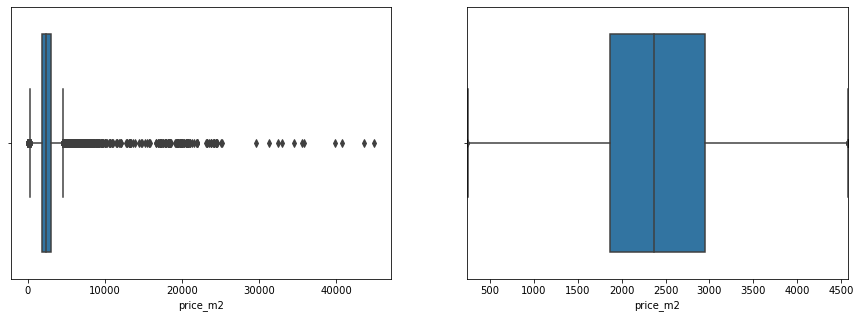

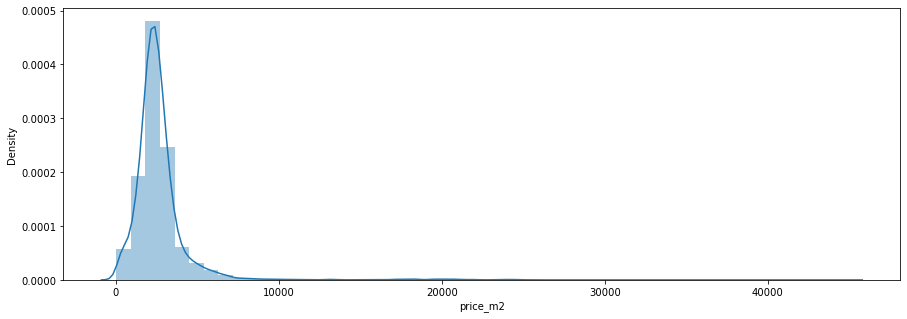

In [28]:
#plotando o bloxplot com preço em metro quadrado por tipo de propriedade
diagrama_caixa(df_properati_std['price_m2'])
#plotando o histograma
histograma(df_properati_std['price_m2'])

In [29]:
#removendo outliers
df_properati_std, linhas_removidas = excluir_outliers(df_properati_std, 'price_m2')
print('{} linhas removidas'.format(linhas_removidas))

1182 linhas removidas


In [30]:
df_properati_std.shape[0]

16033

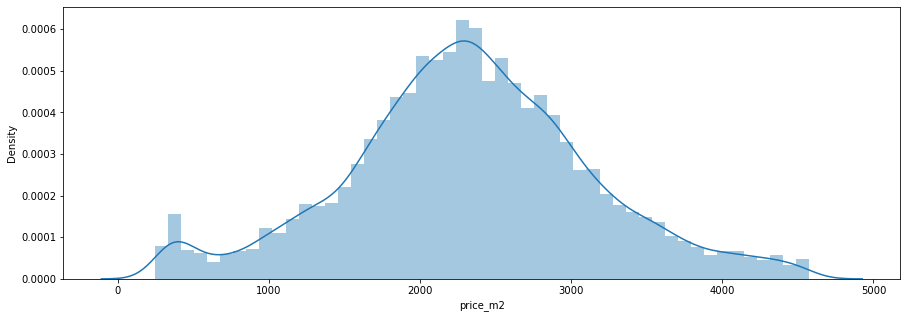

In [31]:
#histograma sem outliers
histograma(df_properati_std['price_m2'])

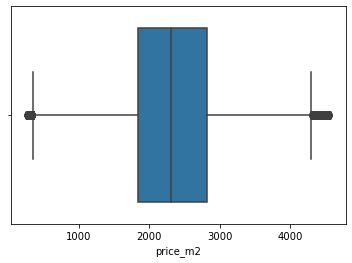

In [32]:
#boxplot sem outliers
ax = sns.boxplot(x='price_m2', data=df_properati_std, orient = 'h')


In [33]:
#correlação entre as colunas
print(df_properati_std.corr())

                          lat       lon     price  surface_total_in_m2  \
lat                  1.000000  0.497940  0.087240            -0.022208   
lon                  0.497940  1.000000  0.064945             0.019912   
price                0.087240  0.064945  1.000000             0.790691   
surface_total_in_m2 -0.022208  0.019912  0.790691             1.000000   
price_m2             0.280127  0.087079  0.192020            -0.163557   

                     price_m2  
lat                  0.280127  
lon                  0.087079  
price                0.192020  
surface_total_in_m2 -0.163557  
price_m2             1.000000  


<AxesSubplot:>

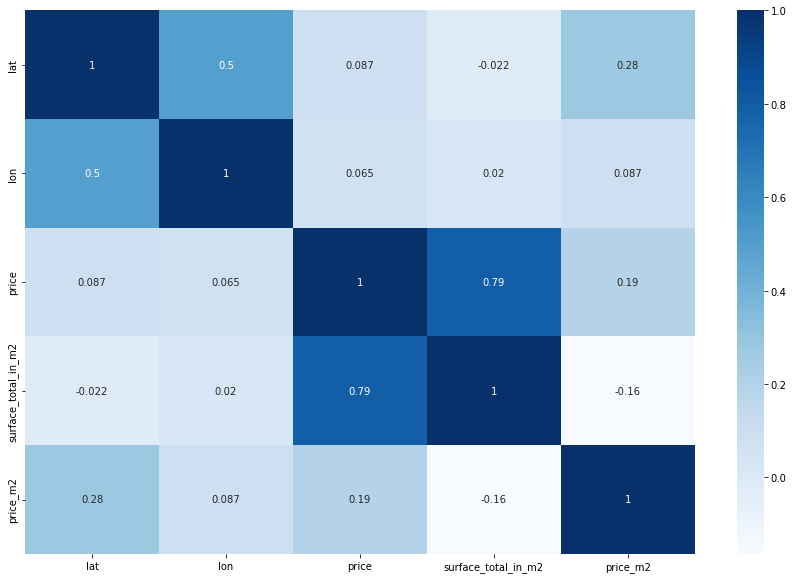

In [34]:
#heatmap pós limpeza dos outliers
plt.figure(figsize=(15,10))
sns.heatmap(df_properati_std.corr(), annot = True, cmap ='Blues')

### Resultados pós remoção dos outliers

In [35]:
#crosstab pós limpeza dos outliers
pd.crosstab(df_properati_std.surface_m2_type, df_properati_std.luxury_m2_type)

luxury_m2_type,super_popular,popular
surface_m2_type,,
XP,29,50
P,5899,4037
M,2717,1748
G,849,342
GG,196,32
XG,61,18
XXG,38,3
XXXG,14,0


<AxesSubplot:xlabel='property_type', ylabel='price_m2'>

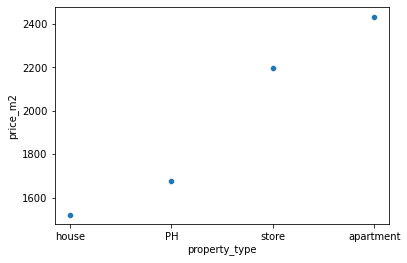

In [41]:
group_property_type_m2 = df_properati_std.groupby(['property_type']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_property_type_m2) 
plt.xticks(rotation=0)
ax

<AxesSubplot:xlabel='place_name', ylabel='price_m2'>

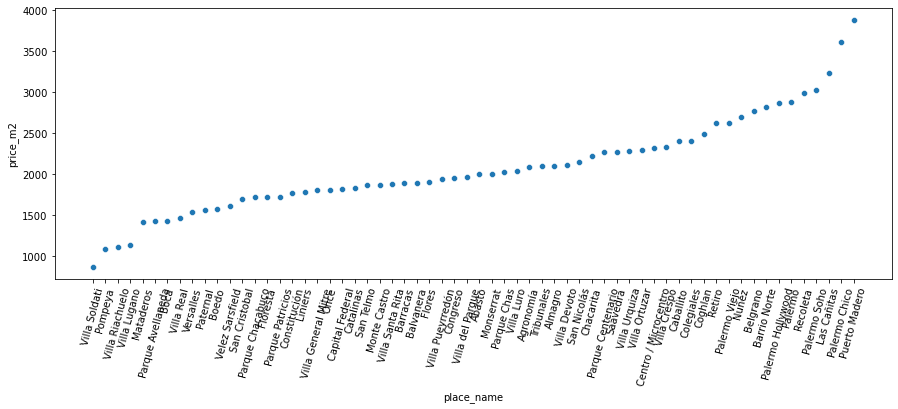

In [37]:
group_place_m2 = df_properati_std.groupby(['place_name']).price_m2.mean().sort_values()
ax = sns.scatterplot(data = group_place_m2) 
ax.figure.set_size_inches(15, 5)
plt.xticks(rotation=75)
ax

<AxesSubplot:xlabel='surface_m2_type', ylabel='price_m2'>

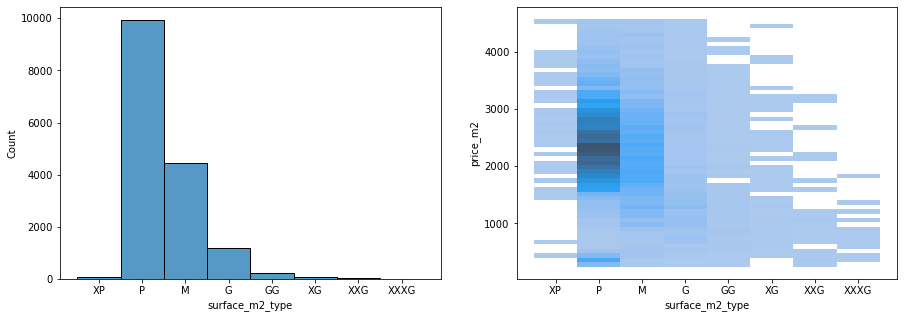

In [42]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(15,5))

sns.histplot(ax=axes[0], data = df_properati_std.surface_m2_type)

sns.histplot(ax=axes[1], data = df_properati_std,  
             x = 'surface_m2_type',
             y = 'price_m2')

<AxesSubplot:title={'center':'Propiedade'}, xlabel='Tipo de Propriedade', ylabel='Preço do m2'>

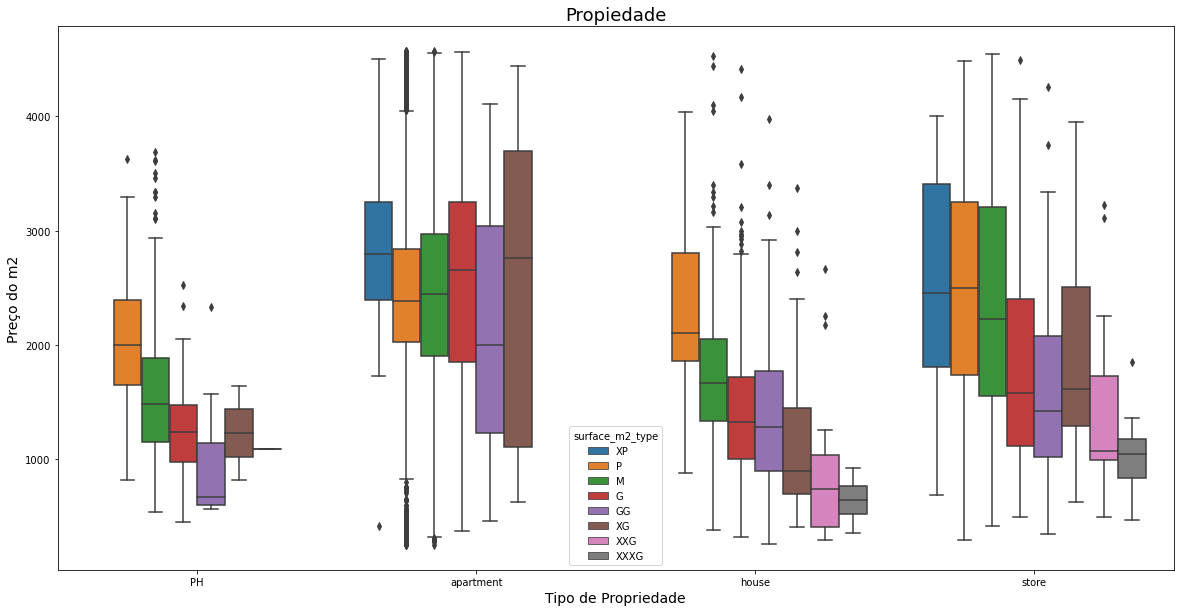

In [36]:
#boxplot sem outliers
ax = sns.boxplot(x='property_type', y='price_m2', data=df_properati_std, hue='surface_m2_type')
ax.figure.set_size_inches(20, 10)
ax.set_title('Propiedade', fontsize=18)
ax.set_xlabel('Tipo de Propriedade', fontsize=14)
ax.set_ylabel('Preço do m2', fontsize=14)
plt.xticks(rotation=0)
ax

In [40]:
len(df_properati_std.place_name.unique())

62